In [28]:
import pandas as pd
import numpy as np

In [29]:
or_data = pd.read_csv('weatherAUS.csv')

In [30]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

In [31]:
or_data = or_data.dropna(subset=features)

In [32]:
data = or_data[features].copy()

In [33]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2


Regularising the data

In [34]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [35]:
def random_centroids(data, k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [36]:
centroids = random_centroids(data, 4)

In [37]:
centroids

,0,1,2,3
MinTemp,7.448819,7.023622,7.330709,4.472441
MaxTemp,4.334091,6.850000,4.252273,7.320455
Rainfall,1.000000,1.357905,1.000000,1.043647
Evaporation,1.687192,1.221675,2.507389,1.133005
Sunshine,4.786207,2.551724,5.220690,8.324138
WindGustSpeed,2.878261,4.208696,3.660870,6.243478
WindSpeed9am,2.477612,3.283582,4.223881,3.283582
WindSpeed3pm,4.671053,4.315789,3.013158,1.473684
Humidity9am,9.100000,3.430000,7.030000,8.110000
Humidity3pm,5.320000,5.500000,4.060000,3.520000


Assigning each element to its closest centroid

In [40]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [41]:
labels = get_labels(data, centroids)

In [43]:
labels.value_counts()

2    24514
0    24139
1     4808
3     4775
dtype: int64

In [46]:
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [48]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d =  pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
  plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
  plt.show()

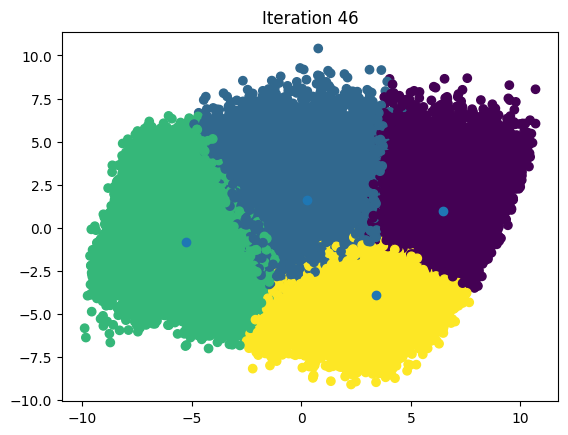

In [51]:
max_iterations = 100
k = 4

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iteration)
  iteration += 1



In [52]:
centroids

,0,1,2,3
MinTemp,6.394682,6.476373,5.141321,4.132167
MaxTemp,6.508396,5.697188,3.920760,4.150342
Rainfall,1.009476,1.061885,1.142450,1.029095
Evaporation,1.929236,1.687815,1.369347,1.373755
Sunshine,8.133303,6.180983,2.678531,6.801143
WindGustSpeed,3.457147,3.489279,3.338574,2.927387
WindSpeed9am,3.019214,2.930650,2.831754,2.527314
WindSpeed3pm,3.232245,3.410813,3.088723,2.866752
Humidity9am,5.027991,6.550468,8.013460,6.982519
Humidity3pm,3.468406,5.078267,6.816345,4.802728
